# Installing the dependencies

> pip install pandas seaborn


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("data/medical_examination.csv")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
print(df.describe())
print(df.info())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [4]:
# Add "overweight" column
df["overweight"] = np.where((df["weight"] / (df["height"] / 100) ** 2) > 25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of "cholesterol" or "gluc" is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


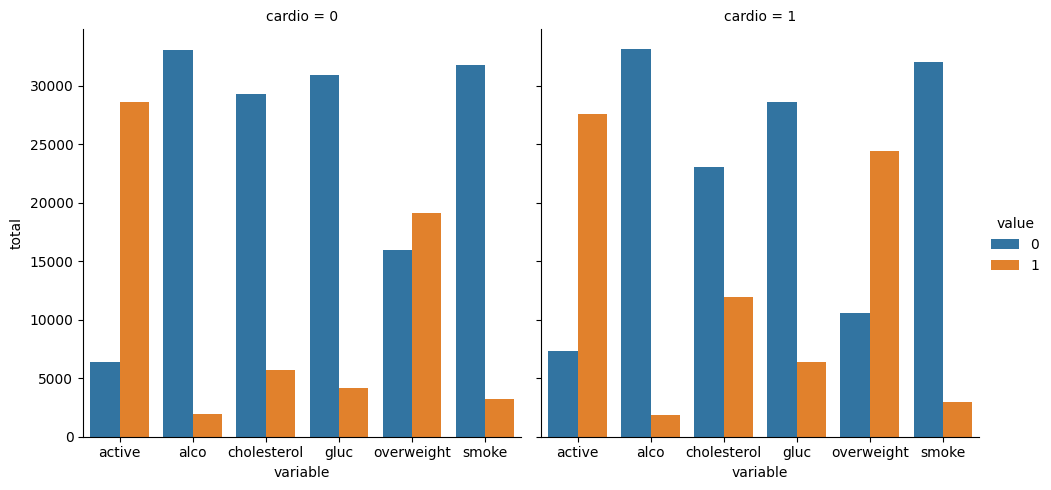

In [5]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from "cholesterol", "gluc", "smoke", "alco", "active", and "overweight".
    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    )

    # Group and reformat the data to split it by "cardio". Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # Solution found at https://forum.freecodecamp.org/t/medical-data-visualizer-confusion/410074/44
    df_cat = (
        df_cat.groupby(["cardio", "variable", "value"], as_index=False)
        .size()
        .rename(columns={"size": "total"})
    )

    # Draw the catplot with "sns.catplot()"
    fig = sns.catplot(
        data=df_cat, x="variable", y="total", col="cardio", hue="value", kind="bar"
    ).fig

    # fig.savefig("catplot.png")
    return fig


plt.show(draw_cat_plot())

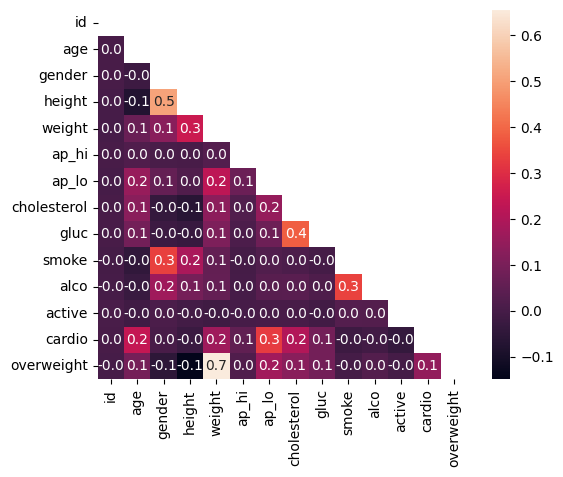

In [8]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    # Hint found at https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with "sns.heatmap()"
    sns.heatmap(corr, mask=mask, ax=ax, square=True, annot=True, fmt=".1f")

    fig.savefig("heatmap.png")
    return fig


plt.show(draw_heat_map())